In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
# data set retrieved from https://www.kaggle.com/mirichoi0218/insurance/tasks
df = pd.read_csv('insurance.csv')

In [155]:
# Explore the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [156]:
# Check for nulls
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [157]:
# Replace non-numerican info to numerical(binary) info
df.smoker.replace(['yes','no'], [1,0], inplace=True)
df.sex.replace(['female','male'], [1,0], inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [158]:
# I will explore the data and see the relantionship between variables
df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


Text(0, 0.5, 'charges')

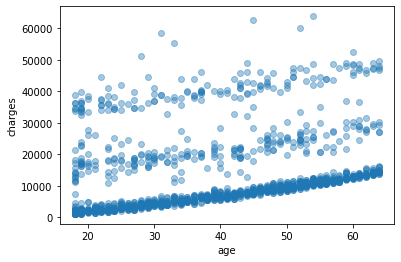

In [159]:
# Plotting each variable against our dependent variable to see graphically linearlity
plt.scatter(df['age'], df['charges'], alpha=0.4)
plt.xlabel('age')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

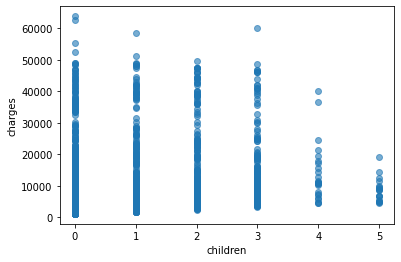

In [160]:
plt.scatter(df['children'], df['charges'], alpha=0.6)
plt.xlabel('children')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

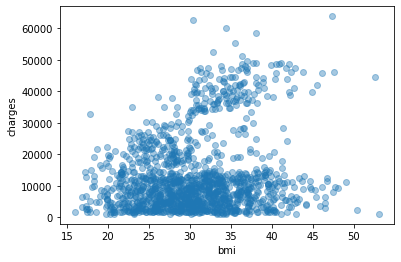

In [161]:
plt.scatter(df['bmi'], df['charges'], alpha=0.4)
plt.xlabel('bmi')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

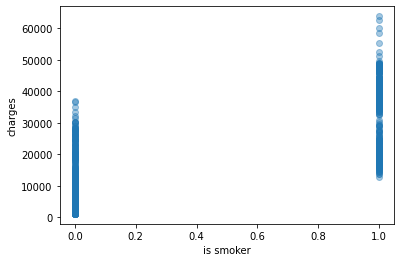

In [162]:
plt.scatter(df['smoker'], df['charges'], alpha=0.4)
plt.xlabel('is smoker')
plt.ylabel('charges')

In [163]:
charges = df['charges']
features = df[['age', 'bmi','smoker', 'children']]

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, charges, test_size=0.2)

In [165]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [166]:
# Analize the model
r2_train = model.score(X_train, y_train)
r2_train

0.7482140310346944

In [167]:
r2_test = model.score(X_test, y_test)
r2_test

0.7556689763549134

In [168]:
sorted(list(zip(['age','sex','bmi', 'smoker', 'children'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('bmi', 23868.580319092875),
 ('smoker', 461.8696149439522),
 ('sex', 327.0024257873241),
 ('age', 252.47248543598405)]

In [169]:
# Get predicted values from the test data
charges_predicted = model.predict(X_test)

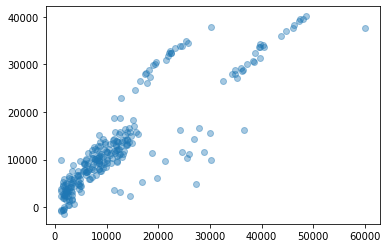

In [170]:
plt.scatter(y_test, charges_predicted, alpha=0.4)

In [171]:
# See if we can improve the model accuracy by removing the features
columns_to_select = ['age', 'smoker', 'bmi']
sex = df[columns_to_select]
X_train, X_test, y_train, y_test = train_test_split(features, charges, test_size=0.2)

In [172]:
model = LinearRegression().fit(X_train, y_train)

In [173]:
model.score(X_train, y_train)

0.7300133707392784

In [206]:
# We get the best r2 score by having all the features except the sex, so we stick with the first model
features = df[['age', 'bmi','smoker', 'children']]
X_train, X_test, y_train, y_test = train_test_split(features, charges, test_size=0.2)
model = LinearRegression().fit(X_train, y_train)
charges_predicted = model.predict(X_test)

In [208]:
import numpy as np

x_single_test = np.array([23,20,0,0]).reshape(1,-1)
charge_single_prediction = model.predict(x_single_test)
print(charge_single_prediction)

[548.3679892]
